## Week 3 Project for Applied Data Science Capstone
### Segmenting and Clustering Neighborhoods in Toronto (Problem 3)¶

### Let's review Problem 1 and 2

In [1]:
import numpy as np 
import pandas as pd
import requests
import urllib.request
import lxml.html as lh
import bs4 as bs

### Scraping web for data¶

In [2]:
#scraping wikipedia to get data file from the url
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
res = requests.get(url)
soup = bs.BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0]
df = pd.read_html(str(table))
data = pd.read_json(df[0].to_json(orient='records'))

In [3]:
#viewing the first five rows from the data
data.head()

,Borough,Neighbourhood,Postcode
0,Not assigned,Not assigned,M1A
1,Not assigned,Not assigned,M2A
2,North York,Parkwoods,M3A
3,North York,Victoria Village,M4A
4,Downtown Toronto,Harbourfront,M5A


### Cleaning data

In [4]:
#selecting Borough data without not assigned value
raw_data_selected = data[data['Borough'] != 'Not assigned']

In [5]:
#data grouping
raw_data_selected = raw_data_selected.groupby(['Borough', 'Postcode'], as_index=False).agg(','.join)

In [6]:
#viewing the first five rows from the data
raw_data_selected.head()

,Borough,Postcode,Neighbourhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,North Toronto West
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park,Summerhill East"


In [7]:
#replacing values in Neighbourhood field with Borough where Neighbourhood is not assigned
raw_data_selected['Neighbourhood'] = np.where(raw_data_selected['Neighbourhood'] == 'Not assigned', raw_data_selected['Borough'], raw_data_selected['Neighbourhood'])

In [8]:
#rhape of Data
raw_data_selected.shape

(103, 3)

## Problem 2: Use the Geocoder package or the csv file to create the following dataframe¶
### Here, the downloaded CSV file will be used as follows:¶

In [9]:
#downloading and reading csv file
geospatial_url = "https://cocl.us/Geospatial_data"
geospatial_data = pd.read_csv(geospatial_url)

In [10]:
#viewing the five rows
geospatial_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [11]:
#renaming the data columns
geospatial_data.columns = ['Postcode', 'Latitude', 'Longitude']

In [12]:
geospatial_data.columns

Index(['Postcode', 'Latitude', 'Longitude'], dtype='object')

In [13]:
#merging dataframes
merged_data = pd.merge(raw_data_selected, geospatial_data, on='Postcode')

In [14]:
#viewing the first five rows
merged_data.head()

,Borough,Postcode,Neighbourhood,Latitude,Longitude
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678
3,Central Toronto,M4S,Davisville,43.704324,-79.388790
4,Central Toronto,M4T,"Moore Park,Summerhill East",43.689574,-79.383160


## Problem 3: Explore and cluster the neighborhoods in Toronto


## Import more libraries

In [ ]:
from shapely.geometry import Point
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [41]:
merged_data['Coordinates'] = list(zip(merged_data['Latitude'], merged_data['Longitude']))

In [42]:
#viewing the first five rows of the merged data
merged_data.head()

,Borough,Postcode,Neighbourhood,Latitude,Longitude,Coordinates
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,"(43.7280205, -79.3887901)"
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,"(43.7127511, -79.3901975)"
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678,"(43.7153834, -79.40567840000001)"
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,"(43.7043244, -79.3887901)"
4,Central Toronto,M4T,"Moore Park,Summerhill East",43.689574,-79.383160,"(43.6895743, -79.38315990000001)"


In [43]:
merged_data['Coordinates'] = merged_data['Coordinates'].apply(Point)

In [44]:
gdf = gpd.GeoDataFrame(merged_data, geometry='Coordinates')

In [45]:
#viewing the first five rows
gdf.head()

,Borough,Postcode,Neighbourhood,Latitude,Longitude,Coordinates
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,POINT (43.7280205 -79.38879009999999)
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,POINT (43.7127511 -79.3901975)
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678,POINT (43.7153834 -79.40567840000001)
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,POINT (43.7043244 -79.38879009999999)
4,Central Toronto,M4T,"Moore Park,Summerhill East",43.689574,-79.383160,POINT (43.6895743 -79.38315990000001)


C:\Users\aaa\Anaconda3\lib\site-packages\geopandas\plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


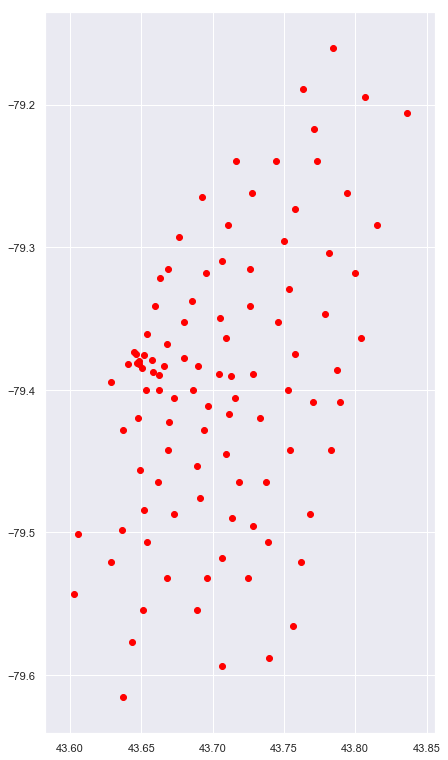

In [46]:
#setting the map
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='green', edgecolor='black')
# plot and show
gdf.plot(ax=ax, color='red')

plt.show()